In [1]:
import sys
src_dir = '/Users/palmerio/Science_projects/GRB_population_model/src/'
sys.path.insert(0, src_dir)
from GRB_population import GRBPopulation, create_GRB_population_from
import physics as ph
import numpy as np
import io_grb_pop as io
import miscellaneous as msc
from cosmology import init_cosmology
from ECLAIRs import init_ECLAIRs
import plotting_functions as pf
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import logging
log = logging.getLogger(__name__)
logging.basicConfig(stream=sys.stdout, level=logging.DEBUG,
                    format='%(asctime)s.%(msecs)03d [%(levelname)s] %(message)s',
                    datefmt='%H:%M:%S')
logging.getLogger('matplotlib').setLevel(logging.WARNING)
plt.style.use('presentation')

In [2]:
paths_to_dir, paths_to_files = io.generate_paths()

13:57:18.544 [DEBUG] Root directory is /Users/palmerio/Science_projects/GRB_population_model
13:57:18.545 [DEBUG] Directory paths :
    'root'    : /Users/palmerio/Science_projects/GRB_population_model
    'obs'     : /Users/palmerio/Science_projects/GRB_population_model/observational_constraints
    'init'    : /Users/palmerio/Science_projects/GRB_population_model/init
    'output'  : /Users/palmerio/Science_projects/GRB_population_model/model_outputs
    'data'    : /Users/palmerio/Science_projects/GRB_population_model/data
    'cosmo'   : /Users/palmerio/Science_projects/GRB_population_model/data/cosmology
    'ECLAIRs' : /Users/palmerio/Science_projects/GRB_population_model/data/ECLAIRs
13:57:18.546 [DEBUG] File paths :
    'config'          : /Users/palmerio/Science_projects/GRB_population_model/init/config.yml
    'param'           : /Users/palmerio/Science_projects/GRB_population_model/init/parameters.yml
    'instrum'         : /Users/palmerio/Science_projects/GRB_population_mo

In [3]:
config, params, instruments, samples, obs_constraints = io.read_init_files(paths_to_files)
config['Nb_GRBs'] = '1e5'
config['samples'] = ['Stern', 'EpGBM', 'eBAT6', 'SHOALS', 'ECLAIRs']
config['output_dir'] = 'debugger'
paths_to_dir['output'] = paths_to_dir['output']/config['output_dir']

13:57:18.574 [DEBUG] Input configuration:
Nb_GRBs: 1e5
constraints:
- Stern
- EpGBM
- eBAT6
output_dir: debugger
samples:
- Stern
- EpGBM
- eBAT6
- Swift
- ECLAIRs
- SHOALS
- GBM_sample
- BATSE_5B_sample

13:57:18.578 [DEBUG] Input parameters:
Cvar_distribution:
    correl_slope: -0.413
    mu: 0.04
    sigma: 0.22
luminosity_function:
    k_evol: 1.0
    logLbreak: 52.56
    logLmax: 53.0
    logLmin: 49.6989700043
    model: ES
    slope: 1.41
peak_energy_distribution:
    Ep0: 690
    alpha_amati: 0.3
    model: LN
    sigmaEp: 0.45
redshift_distribution:
    a: 0.94
    b: -0.52
    model: BExp
    zeta: null
    zm: 2.18
    zmax: 20
spectral_shape:
    alpha: 0.6
    beta: 2.5
    model: GBM_Band
t90obs_distribution:
    mu: 1.45
    sigma: 0.47



In [4]:
print(paths_to_dir['output'])

/Users/palmerio/Science_projects/GRB_population_model/model_outputs/debugger


In [5]:
cosmo = init_cosmology(paths_to_dir['cosmo'])
ECLAIRs_prop = init_ECLAIRs(ECLAIRs_dir=paths_to_dir['ECLAIRs'],
                            ECLAIRs_config=instruments['ECLAIRs'])
samples['ECLAIRs']['pflx_min'] = ECLAIRs_prop['bkg_total']

incl_samples, incl_instruments, incl_constraints = io.create_config(config=config,
                                                       samples=samples,
                                                       instruments=instruments,
                                                       obs_constraints=obs_constraints)

13:57:18.595 [DEBUG] Read cosmology from directory /Users/palmerio/Science_projects/GRB_population_model/data/cosmology: [0.3, 0.7, 0.7]
13:57:18.596 [DEBUG] ==============================================
13:57:18.597 [DEBUG] ===           ECLAIRs instrument           ===
13:57:18.597 [DEBUG] ==============================================
13:57:18.598 [DEBUG] ECLAIRs energy channel: 4.0 to 150.0 keV
13:57:18.598 [DEBUG] ECLAIRs detection level: 6.5 sigmas
13:57:18.627 [DEBUG] Effective area: from 1.013650e+02 cm2 at 4.00 keV
13:57:18.628 [DEBUG] Effective area: to   1.811580e+02 cm2 at 250.00 keV
13:57:18.628 [DEBUG] Background: from 2.819620e+02 cts/s/keV at 4.00 keV
13:57:18.629 [DEBUG] Background: to   8.730200e-02 cts/s/keV at 250.00 keV
13:57:18.630 [DEBUG] ECLAIRs background: 3.098396e+03 cts/s from 4.00 keV to 150.00 keV
13:57:18.630 [DEBUG] ==============================================
13:57:18.631 [INFO] Including samples: ['Stern', 'EpGBM', 'eBAT6', 'SHOALS', 'ECLAIRs']
13:5

In [6]:
np.random.seed(1)
gp = create_GRB_population_from(Nb_GRBs=config['Nb_GRBs'],
                                cosmo=cosmo,
                                params=params,
                                incl_samples=incl_samples,
                                incl_instruments=incl_instruments,
                                incl_constraints=incl_constraints,
                                ECLAIRs_prop=ECLAIRs_prop,
                                output_dir=paths_to_dir['output'])


13:57:23.791 [INFO] Starting calculations of peak photon fluxes...
13:57:23.792 [DEBUG] For BATSE instrument [50, 300 keV]:
13:57:24.884 [DEBUG] Done in 1.091 s
13:57:24.926 [INFO] Starting calculations of peak photon fluxes...
13:57:24.927 [DEBUG] For BAT instrument [15.0, 150.0 keV]:
13:57:25.961 [DEBUG] Done in 1.033 s
13:57:25.962 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
13:57:27.671 [DEBUG] Done in 1.709 s
13:57:27.672 [INFO] Starting calculations of peak energy fluxes...
13:57:27.673 [DEBUG] For BATSE instrument [50.0, 300.0 keV]:
13:57:28.580 [DEBUG] Done in 0.907 s
13:57:28.581 [DEBUG] For BAT instrument [15.0, 150.0 keV]:
13:57:29.491 [DEBUG] Done in 0.909 s
13:57:29.491 [DEBUG] For ECLAIRs instrument [4.0, 150.0 keV]:
13:57:31.139 [DEBUG] Done in 1.647 s
13:57:31.140 [DEBUG] Starting calculations of photon fluences...
13:57:31.145 [DEBUG] Done in 0.004 s
13:57:31.146 [DEBUG] Starting calculations of energy fluences...
13:57:31.151 [DEBUG] Done in 0.004 s
13:57:31.151 

Sample size :82


/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.
/Users/palmerio/miniconda3/envs/python3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:444: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # will not work for two columns.


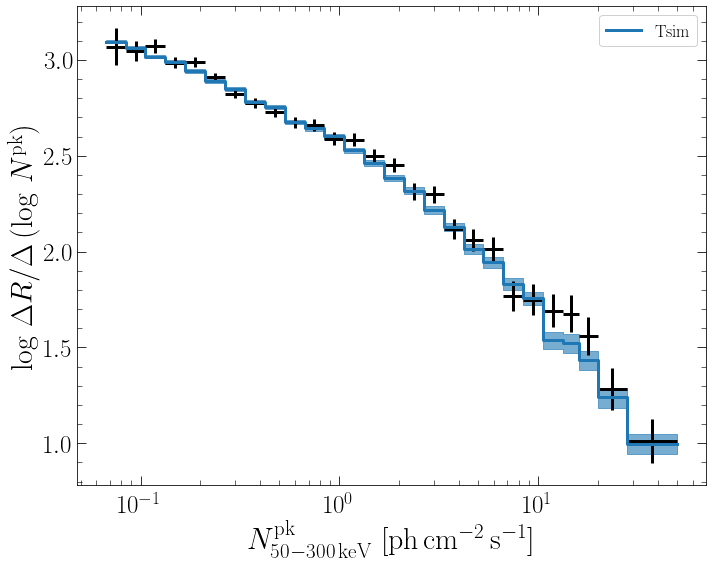

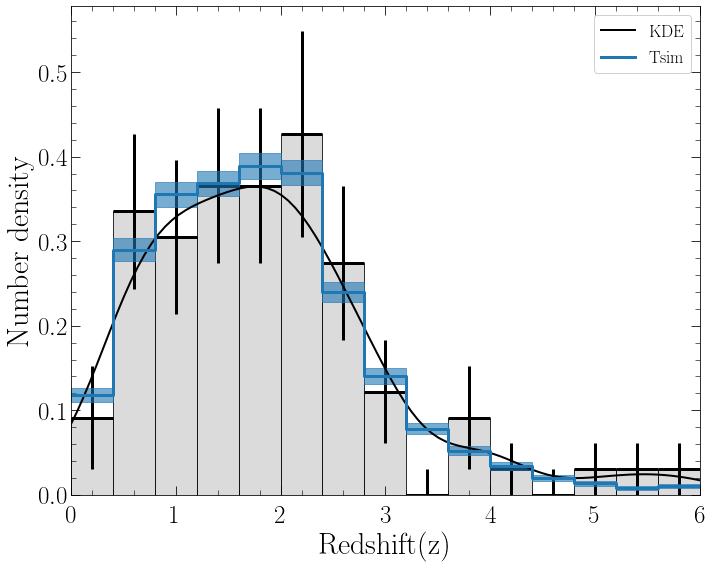

In [7]:
plt.style.use('paper')
fig, ax = plt.subplots(figsize=(10,8))
pf.plot_intensity_constraint(ax=ax, pop=gp, label='Tsim')
ax.legend()
fig, ax = plt.subplots(figsize=(10,8))
pf.plot_redshift_constraint(ax=ax, pop=gp, label='Tsim')
ax.legend()

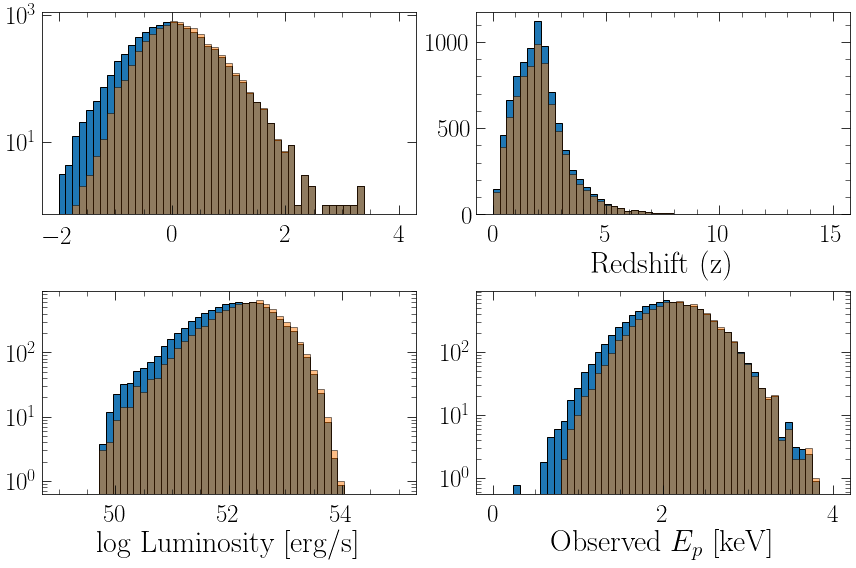

In [8]:
# def plot_ECLAIRs_pop(pop):
pop = gp
fig, axes = plt.subplots(2,2, figsize=(12,8))
df = pop.properties
# pflx distr
axes[0,0].hist(np.log10(df['pht_pflx_BATSE']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(-2,4, 50))
axes[0,0].hist(np.log10(df['pht_pflx_BATSE']), weights=df['pdet_SHOALS'], bins=np.linspace(-2,4, 50), alpha=0.5)
axes[0,0].set_yscale('log')
    
# z distr
axes[0,1].hist(df['z'], weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(0, 15, 50))
axes[0,1].hist(df['z'], weights=df['pdet_SHOALS'], bins=np.linspace(0, 15, 50), alpha=0.5)
axes[0,1].set_xlabel('Redshift (z)')
# axes[0,1].set_yscale('log')

# L distr
axes[1,0].hist(np.log10(df['L']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(49, 55, 51))
axes[1,0].hist(np.log10(df['L']), weights=df['pdet_SHOALS'], bins=np.linspace(49, 55, 51), alpha=0.5)
axes[1,0].set_xlabel('log Luminosity [erg/s]')
axes[1,0].set_yscale('log')

# Ep distr
axes[1,1].hist(np.log10(df['Epobs']), weights=df['pdet_ECLAIRs_tot'], bins=np.linspace(0, 4, 51))
axes[1,1].hist(np.log10(df['Epobs']), weights=df['pdet_SHOALS'], bins=np.linspace(0, 4, 51), alpha=0.5)
axes[1,1].set_xlabel('Observed $E_p$ [keV]')
axes[1,1].set_yscale('log')

#     return

In [9]:
df

,z,D_L,L,Ep,alpha,beta,ktild,Epobs,pht_pflx_BATSE,t90,...,erg_flnc_BATSE,erg_flnc_BAT,erg_flnc_ECLAIRs,pdet_Stern,pdet_EpGBM,pdet_eBAT6,pdet_SHOALS,pdet_ECLAIRs_tot,pdet_ECLAIRs_pht_flnc,pdet_ECLAIRs_pht_cts
0,2.170,17401.053714,3.614029e+50,1359.520128,0.860675,2.62545,0.918250,428.870703,0.013940,9.725305,...,1.831008e-08,1.123093e-08,4.114768e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,3.079,26674.280384,1.363275e+51,836.523242,0.631338,3.14171,1.518077,205.080471,0.044846,8.785559,...,6.081942e-08,4.346737e-08,1.583862e-05,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,0.102,464.577272,7.374763e+49,1990.981125,0.528301,2.86500,1.596361,1806.697936,0.720202,13.665846,...,5.971089e-07,2.423974e-07,8.188913e-05,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,1.897,14739.898648,3.543551e+50,2152.396189,0.621347,2.19460,0.601913,742.974176,0.004830,6.245621,...,5.306995e-09,2.541451e-09,8.804933e-07,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,1.403,10129.311984,1.831243e+51,800.897126,0.451198,2.51653,1.394875,333.290523,0.211422,13.743068,...,4.891137e-07,2.640507e-07,9.131275e-05,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3.305,29057.256652,1.012078e+51,510.985438,0.667765,2.31065,0.798291,118.695804,0.019168,9.215807,...,2.574960e-08,2.406587e-08,9.267541e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99996,3.107,26968.073361,4.635448e+50,1534.558289,0.602841,3.18291,1.590126,373.644580,0.009690,15.889507,...,1.450302e-08,8.073213e-09,2.840249e-06,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99997,3.615,32366.378595,7.944843e+50,2214.639660,0.841180,2.56481,0.901327,479.878583,0.007684,12.330635,...,6.194006e-08,3.668010e-08,1.334548e-05,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
99998,2.541,21117.997938,1.664388e+52,1079.630387,0.655990,3.14171,1.469114,304.894207,0.670358,12.154898,...,1.331976e-06,8.134591e-07,2.910054e-04,1.0,0.0,0.0,0.0,0.319026,0.319026,0.151261


In [7]:
gp.parameters['cosmology']

{'OmegaM': 0.3, 'OmegaL': 0.7, 'h': 0.7}

In [15]:
cosmo['parameters']['parameters']

{'OmegaM': 0.3, 'OmegaL': 0.7, 'h': 0.7}